In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
url = "https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt"
df = pd.read_csv(url)

In [12]:
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [15]:
df.tail()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000
644,648,1376.946,6,7,3,2,1,36000


In [18]:
df.reset_index(drop = True)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [20]:
df.dtypes

Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [24]:
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [25]:
df[df['Sqft'] == 0.00]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price


In [26]:
df.shape

(645, 7)

In [27]:
df.query('Price <= 0')

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price


In [28]:
df.columns

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

In [29]:
df.rename(columns = {'Living.Room' : 'Living Room'})

,Sqft,Floor,TotalFloor,Bedroom,Living Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [30]:
df['Sqft'].value_counts()

711.600     21
925.080     13
2134.800    11
1707.840    10
2063.640    10
            ..
1106.538     1
882.384      1
665.346      1
1209.720     1
1376.946     1
Name: Sqft, Length: 288, dtype: int64

In [31]:
df['Price'].value_counts()

45000     47
55000     29
36000     25
50000     22
100000    17
          ..
41999      1
23800      1
65999      1
67000      1
24800      1
Name: Price, Length: 153, dtype: int64

In [32]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [53]:
import seaborn as sns

<AxesSubplot:>

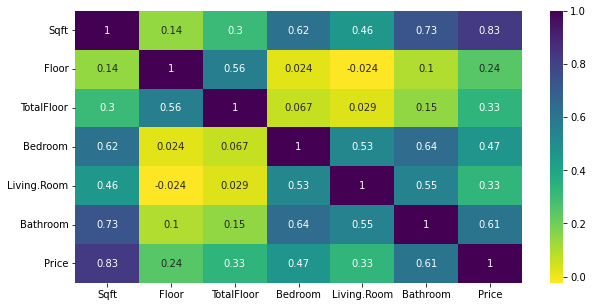

In [54]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True,cmap=plt.cm.get_cmap('viridis_r'))

C:\Users\sai\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sqft'>

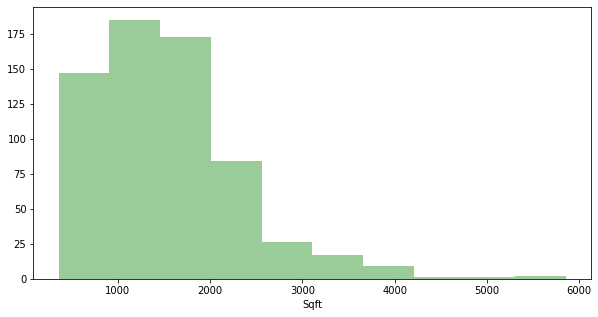

In [58]:
plt.figure(figsize=(10,5))
sns.distplot(df['Sqft'],kde = False, color = 'green', bins = 10)

<AxesSubplot:xlabel='Price', ylabel='Density'>

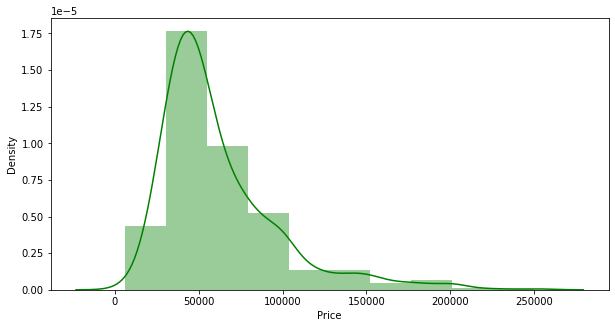

In [59]:
plt.figure(figsize=(10,5))
sns.distplot(df['Price'],kde = True, color = 'green', bins = 10)

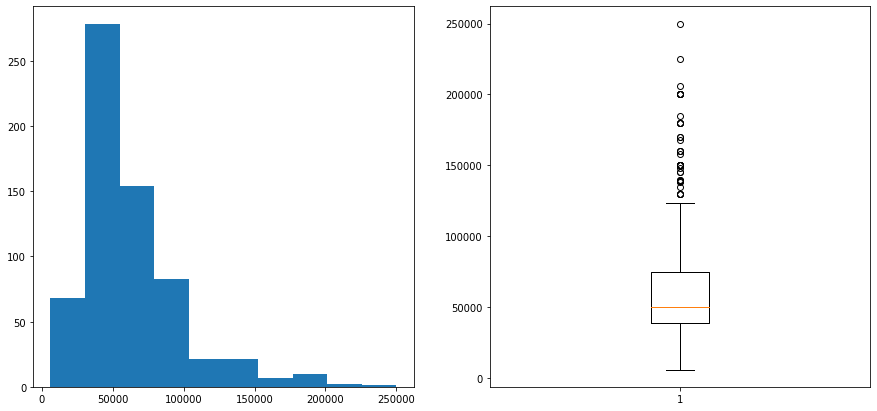

In [61]:
figs = plt.figure(figsize=(15,7))
ax1 = figs.add_subplot(121)
ax2 = figs.add_subplot(122)
x = df["Price"]
ax1.hist(x)
ax2.boxplot(x);

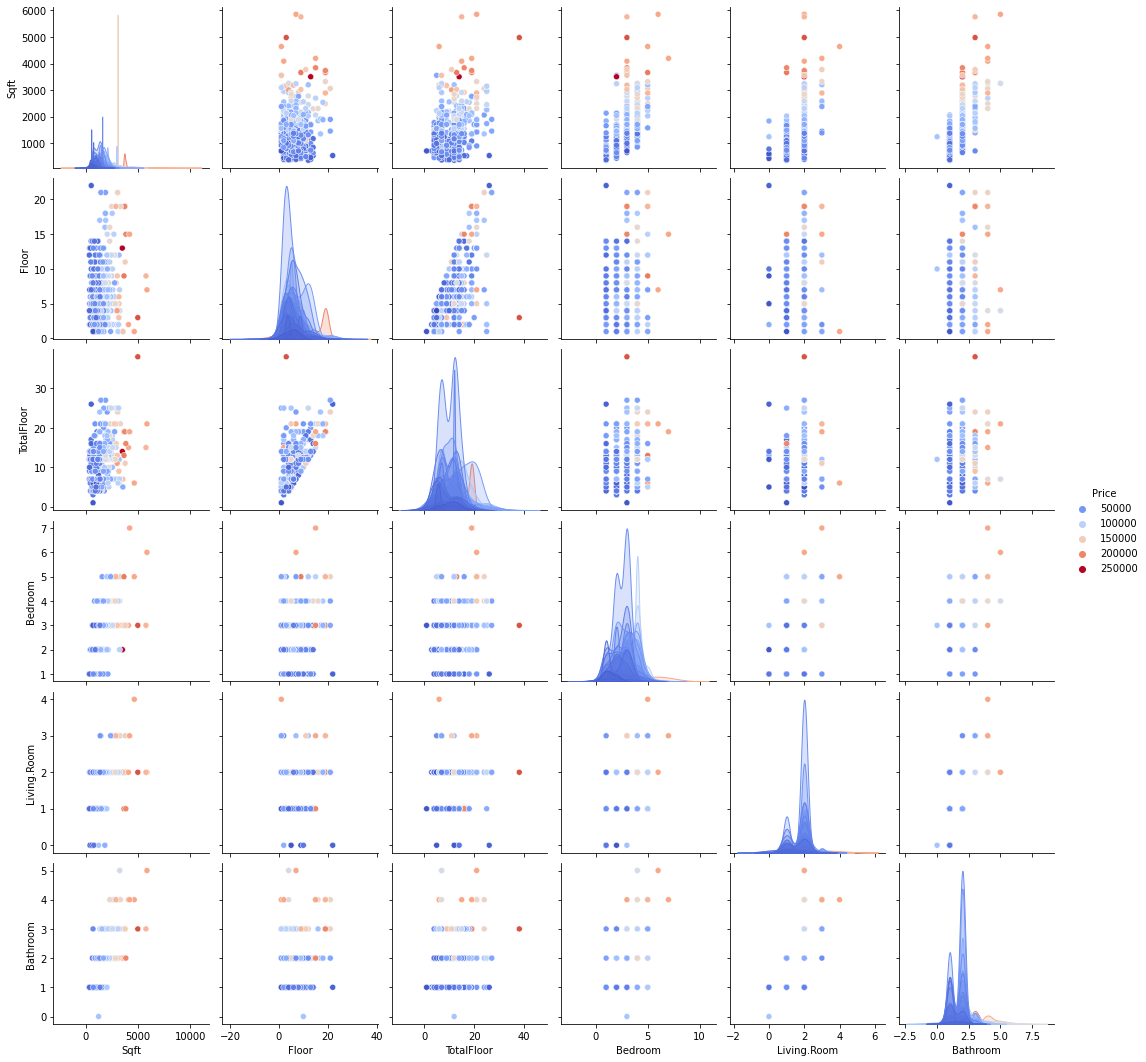

In [68]:
sns.pairplot(df, hue = 'Price', palette = 'coolwarm')

<AxesSubplot:xlabel='Sqft', ylabel='Price'>

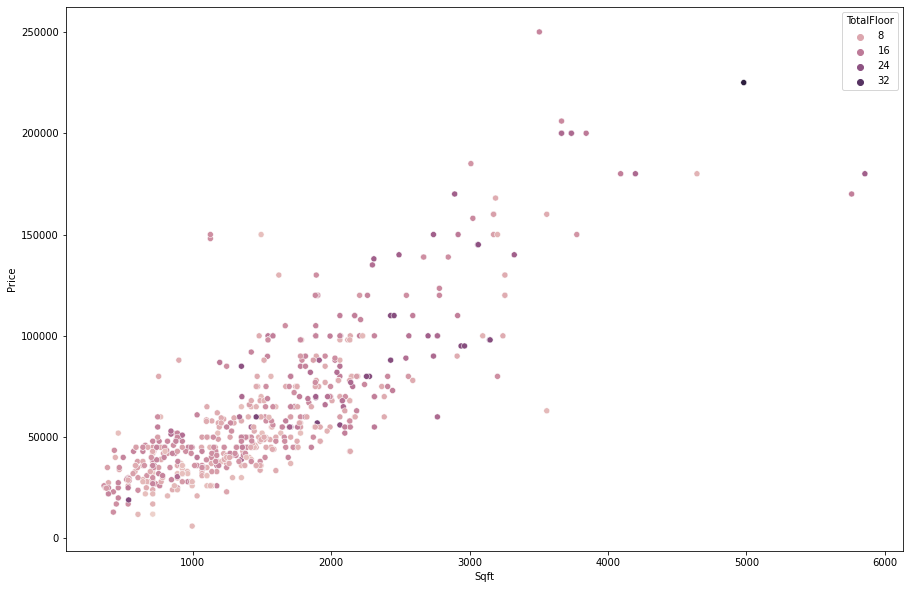

In [71]:
plt.figure(figsize = (15,10))
sns.scatterplot(data = data, x = data['Sqft'], y = data['Price'], hue = 'TotalFloor')

<AxesSubplot:xlabel='Bathroom', ylabel='Price'>

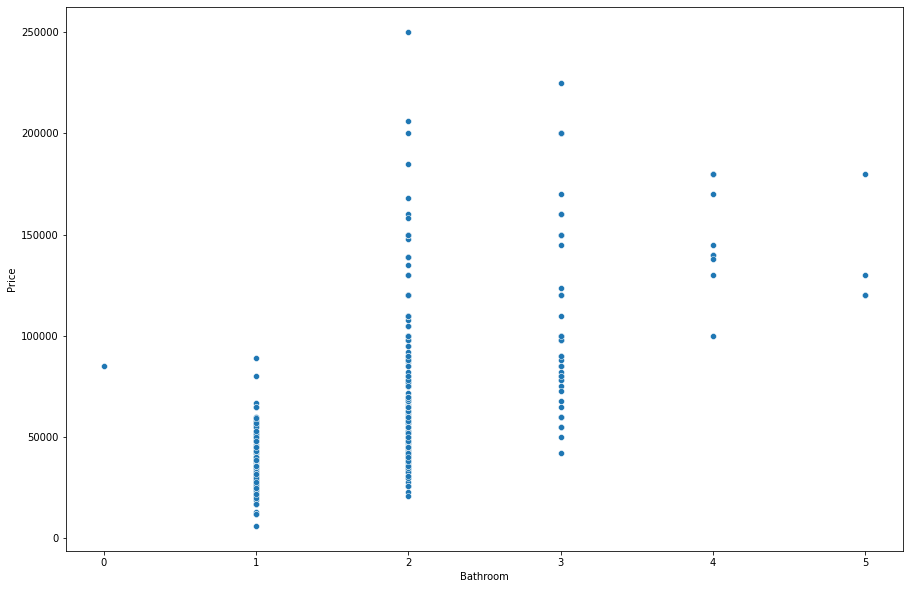

In [70]:
plt.figure(figsize = (15,10))
sns.scatterplot(data = data, x = data['Bathroom'], y = data['Price'])

In [72]:
from scipy import stats
x = np.abs(stats.zscore(data))
print(x)

         Sqft     Floor  TotalFloor   Bedroom  Living.Room  Bathroom     Price
0    0.456393  1.014897    0.772347  0.828956     0.402694  0.276918  0.000370
1    0.791798  0.242042    0.772347  1.151328     0.402694  0.276918  0.449714
2    0.507434  0.242042    0.772347  0.828956     0.402694  1.187117  0.111966
3    0.089824  1.014897    0.772347  0.161186     0.402694  0.276918  0.477058
4    0.730160  1.303669    0.629803  0.161186     0.402694  0.276918  0.477058
..        ...       ...         ...       ...          ...       ...       ...
640  0.219747  0.273195    0.830110  0.161186     0.402694  0.276918  0.477058
641  1.500419  0.499660    0.171426  1.819099     1.761785  1.187117  1.044355
642  1.027127  1.818907    0.629803  1.819099     1.761785  1.187117  0.477058
643  0.234984  0.757279    0.629803  0.161186     0.402694  0.276918  0.084622
644  0.196547  0.015577    0.772347  0.161186     0.402694  1.187117  0.729814

[645 rows x 7 columns]


In [74]:
print(np.where(x<3))

(array([  0,   0,   0, ..., 644, 644, 644], dtype=int64), array([0, 1, 2, ..., 4, 5, 6], dtype=int64))


In [76]:
df = df[(x<3).all(axis =1 )]

In [77]:
df.shape

(608, 7)

In [107]:
X = df.drop(labels = ['Price'] , axis = 1)
y = df['Price']

In [108]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [109]:
scaler = MinMaxScaler(feature_range = (0,1))
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [110]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier

In [111]:
rmse = []
for k in range(1,21):
    knn = neighbors.KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = sqrt(mean_squared_error(y_test,y_pred))
    rmse.append(error)
    
    print('RMSE for k =',k,'is',error)

RMSE for k = 1 is 23525.59815723583
RMSE for k = 2 is 22064.57895736
RMSE for k = 3 is 20374.95370491014
RMSE for k = 4 is 20067.090087118988
RMSE for k = 5 is 19679.241082569766
RMSE for k = 6 is 19366.245465537875
RMSE for k = 7 is 19150.53780108869
RMSE for k = 8 is 19379.04199315564
RMSE for k = 9 is 19694.899820157174
RMSE for k = 10 is 19784.944050584378
RMSE for k = 11 is 19841.734322704768
RMSE for k = 12 is 19932.98025469817
RMSE for k = 13 is 20008.229416999606
RMSE for k = 14 is 20083.38170297586
RMSE for k = 15 is 20188.380539139704
RMSE for k = 16 is 20274.45483905883
RMSE for k = 17 is 20307.2342891469
RMSE for k = 18 is 20292.336518486554
RMSE for k = 19 is 20196.05458321592
RMSE for k = 20 is 20109.214601157593


<AxesSubplot:>

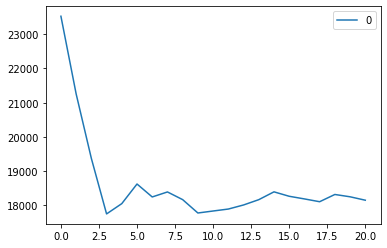

In [83]:
curve = pd.DataFrame(rmse)
curve.plot()

In [ ]:
#At k= 7, the RMSE is approximately 19150, and shoots up on further increasing the k value. 
#We can safely say that k=6 will give us the best result in this case.